In [69]:
from __future__ import absolute_import, division, print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append("../gym-sepsis/")
import gym_sepsis
from gym_sepsis.envs.sepsis_env_bayesian import SepsisEnvBayesian
from gym_sepsis.envs.sepsis_env import SepsisEnv
from gym_sepsis.envs.sepsis_env import SepsisEnvVariational


In [70]:
data = np.load("../processed_data.npz")
df = pd.read_csv("/Users/amir/Downloads/test_state_action_reward_df.csv")

In [71]:
sepsis_env = SepsisEnv()
sepsis_env_bayesian = SepsisEnvBayesian()
sepsis_env_variational = SepsisEnvVariational()

Tensor("z_2/random_normal:0", shape=(?, 30), dtype=float32)
Tensor("z_3/random_normal:0", shape=(?, 30), dtype=float32)


In [72]:
x = data['x_test']
y = data['y_test']

In [73]:
columns = ['ALBUMIN', 'ANION GAP', 'BANDS', 'BICARBONATE',
       'BILIRUBIN', 'BUN', 'CHLORIDE', 'CREATININE', 'DiasBP', 'Glucose',
       'GLUCOSE', 'HeartRate', 'HEMATOCRIT', 'HEMOGLOBIN', 'INR', 'LACTATE',
       'MeanBP', 'PaCO2', 'PLATELET', 'POTASSIUM', 'PT', 'PTT', 'RespRate',
       'SODIUM', 'SpO2', 'SysBP', 'TempC', 'WBC', 'age', 'is_male',
       'race_white', 'race_black', 'race_hispanic', 'race_other', 'height',
       'weight', 'vent', 'sofa', 'lods', 'sirs', 'qsofa', 'qsofa_sysbp_score',
       'qsofa_gcs_score', 'qsofa_resprate_score', 'elixhauser_hospital',
       'blood_culture_positive']


In [89]:
# sns.set(style="white")
from matplotlib.pyplot import figure
    

def plot(column, start, end, sepsis_env):
    simulated_states = np.zeros(shape=(3, end - start, x[start].shape[0] - 1))
    simulated_states[0][0] = np.squeeze(sepsis_env.reset(starting_state=x[start][:-1]))
    simulated_states[1][0] = np.squeeze(sepsis_env_bayesian.reset(starting_state=x[start][:-1]))
    simulated_states[2][0] = np.squeeze(sepsis_env_variational.reset(starting_state=x[start][:-1]))
    doctor_actions = x[start:end][:,46]
    for i in range(1, end - start):
        simulated_states[0][i, :] = np.squeeze(sepsis_env.step(doctor_actions[i])[0])
        simulated_states[1][i, :] = np.squeeze(sepsis_env_bayesian.step(doctor_actions[i])[0])
        simulated_states[2][i, :] = np.squeeze(sepsis_env_variational.step(doctor_actions[i])[0])
    plt.plot(np.array(x[start:end, columns.index(column)]),label="Truth", scaley=False)
    plt.plot(np.array(simulated_states[0][:,columns.index(column)]), label="RNN", scaley=False)
    plt.plot(np.array(simulated_states[1][:,columns.index(column)]),label="RNN+MDN" , scaley=False)
    plt.plot(np.array(simulated_states[2][:,columns.index(column)]), label="RNN+VAE", scaley=False)
    plt.ylim(-2, 2)
    plt.legend(["Truth", "RNN", "RNN+MDN", "RNN+VAE"])
    plt.title(column)

In [90]:
things_to_plot = columns

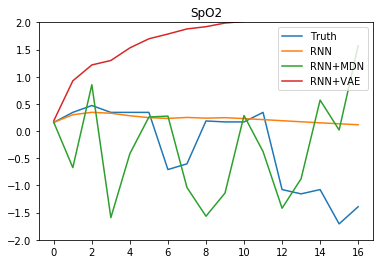

In [91]:
plot("SpO2" ,6, 23, sepsis_env)

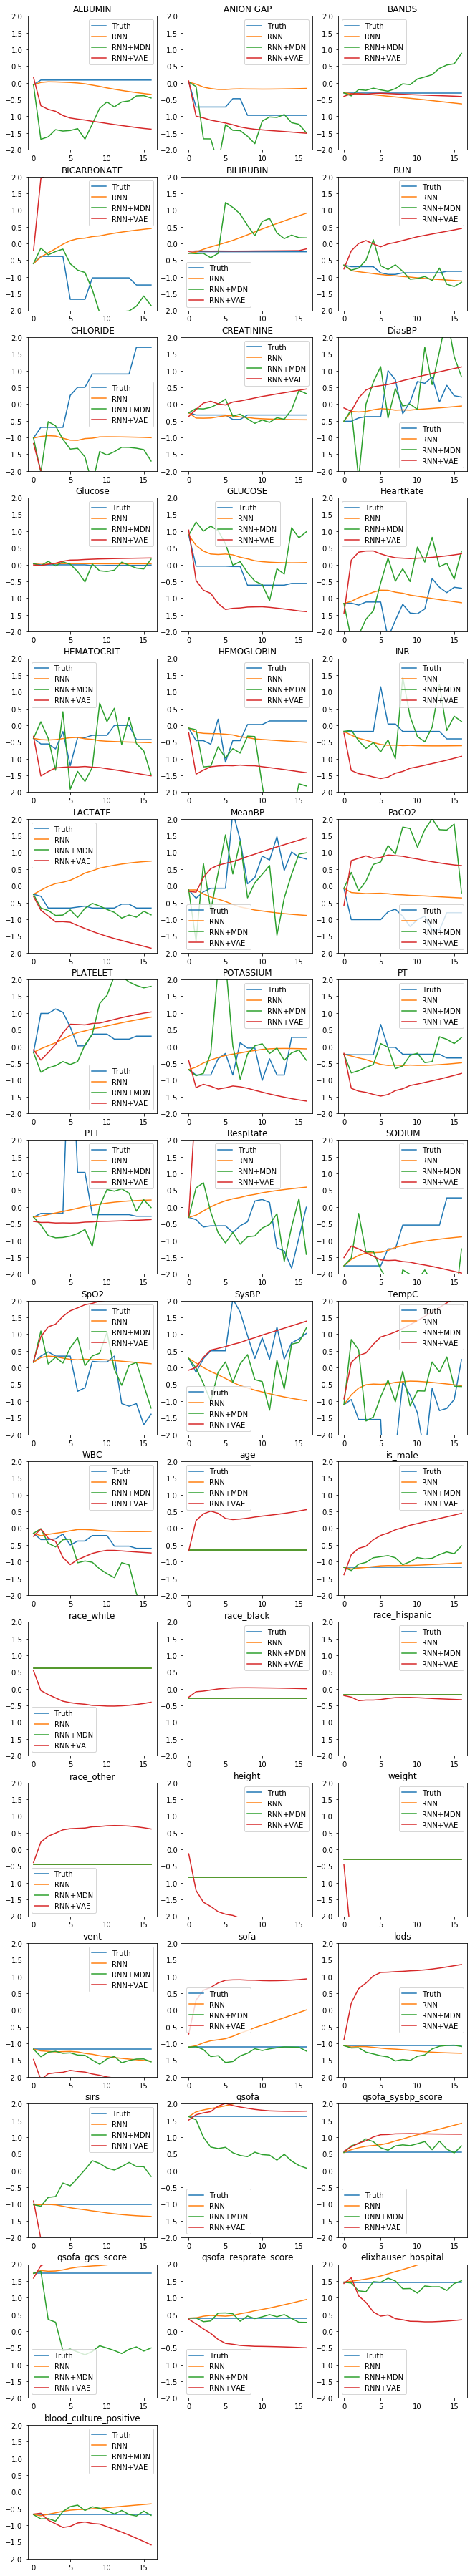

In [92]:
things_to_plot = columns
num_plot_per_row = 3
num_rows = len(things_to_plot) / num_plot_per_row + 1

fig = plt.figure(1, figsize=(11, num_rows * 4))
fig.tight_layout()

for i in range(len(things_to_plot)):
    ax1 = plt.subplot(num_rows, num_plot_per_row, i + 1)
    plot(things_to_plot[i], 6, 23, sepsis_env)

